# FOOD INSECURITY IN THE UNITED STATES

Data 602 Final 

by Jean Jimenez


## Abstract

This project investigates racial and ethnic disparities in food insecurity rates across various states in the United States, drawing on data from Feeding America's "Map the Meal Gap 2023" report. With a focus on Black, Hispanic, and White populations, this analysis employs statistical tools, including ANOVA and Tukey HSD tests, to identify significant differences in food insecurity rates among these groups. The results reveal pronounced disparities, with Black populations consistently experiencing the highest rates of food insecurity, especially in states like DC, LA, and WY. Hispanic populations also face higher insecurity rates compared to White populations, particularly in Minnesota, highlighting a significant need for targeted food security interventions. Conversely, White populations generally experience the lowest rates, especially in DC and ND. These findings underscore the importance of designing food security policies that are sensitive to the racial dynamics within states. By examining food insecurity, this project aims to inform policies that can more effectively address these disparities. 


## Introduction

In the United States, food insecurity remains a pressing issue, affecting millions of individuals across various demographic lines. However, the extent and nature of food insecurity can vary significantly between different racial and ethnic groups. This project seeks to explore these disparities, aiming to answer whether food insecurity rates differ among racial and ethnic groups and identify the states where these differences are most pronounced. I will analyze the distribution of food insecurity rates across Black, Hispanic, and White populations in selected states. By delving into these differences,I aim to provide insights that could inform targeted interventions and policies designed to combat food insecurity effectively and equitably across the United States. 


## Methods

The data used for this project was obtained from Feeding America. Feeding America is a large nonprofit organization dedicated to fighting hunger across the United States. It gathers data on food insecurity from a variety of sources, including government reports, direct observation, and its extensive network of food banks and community organizations. 
This data helps them identify who needs help and where the greatest needs are. They make their findings public to raise awareness, drive policy changes, and encourage donations and volunteerism. By sharing information openly, Feeding America aims to promote more collaboration and more effective solutions to hunger nationwide. Data was obtained after putting in a request to access the data.

Data Citation --  

Feeding America. "Map the Meal Gap 2023: A Report on County and Congressional District 
Food Insecurity and County Food Cost in the United States in 2019-2021." 2023.
https://www.feedingamerica.org/about-us


I will conduct an ANOVA and Tukey HSD test as my statistical analysis.


## Exploratory Data Analysis  


First, I begin by importing the dataset from the csv file I made. This csv was made from another project for another class I am doing. It is part of a larger data extraction effort done with python code not in this final. However, I will add the citation for my other project here for reference:

https://github.com/sleepysloth12/data608_story6


After importing the csv file, I chose a few random states just to visualize the distribution of the food insecurity rate for the 3 racial groups. I visualize it by using boxplot using seaborn.

I also created this `summary_stats` dataframe that displays the summary statistics per state for each racial group.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.express as px
import plotly.graph_objects as go

                        count      mean       std   min     25%   50%     75%  \
State Race_group                                                                
AL    FI_rate_black      21.0  0.262857  0.025523  0.20  0.2500  0.27  0.2800   
      FI_rate_hispanic   21.0  0.128571  0.015260  0.10  0.1200  0.13  0.1400   
      FI_rate_white      21.0  0.109524  0.017742  0.08  0.1000  0.11  0.1200   
LA    FI_rate_black      18.0  0.223889  0.026377  0.17  0.2200  0.23  0.2475   
      FI_rate_hispanic   18.0  0.167778  0.018329  0.14  0.1525  0.17  0.1800   
      FI_rate_white      18.0  0.105556  0.014642  0.08  0.1000  0.11  0.1100   
NY    FI_rate_black      81.0  0.183827  0.064818  0.05  0.1400  0.19  0.2400   
      FI_rate_hispanic   81.0  0.182346  0.038996  0.10  0.1500  0.18  0.2100   
      FI_rate_white      81.0  0.070741  0.037175  0.01  0.0500  0.07  0.0900   
VA    FI_rate_black      33.0  0.158182  0.050895  0.03  0.1200  0.18  0.1900   
      FI_rate_hispanic   33.

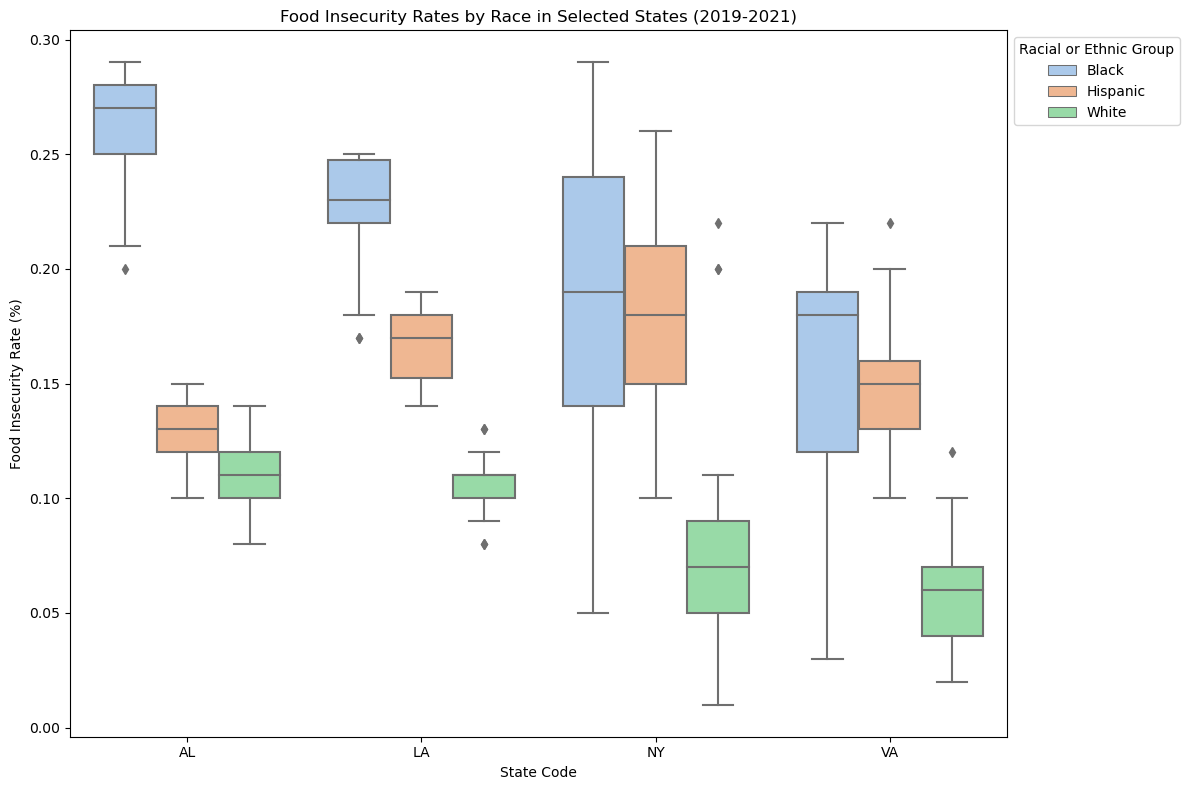

In [30]:
congressional_data = pd.read_csv('https://raw.githubusercontent.com/sleepysloth12/data602_final/main/2019_2021_cong_DI_dat.csv')


target_states = ['LA',  'AL', 'NY', 'VA']
congressional_data_filtered = congressional_data[congressional_data['State'].isin(target_states)]


congressional_data_melted = congressional_data_filtered.melt(id_vars=['State', 'year'], 
                                                             value_vars=['FI_rate_black', 'FI_rate_hispanic', 'FI_rate_white'], 
                                                             var_name='Race_group', value_name='FI_rate_value')

summary_stats = congressional_data_melted.groupby(['State', 'Race_group'])['FI_rate_value'].describe()


print(summary_stats)


plt.figure(figsize=(12, 8))
sns_boxplot = sns.boxplot(x='State', y='FI_rate_value', hue='Race_group', data=congressional_data_melted, palette='pastel')

plt.title('Food Insecurity Rates by Race in Selected States (2019-2021)')
plt.ylabel('Food Insecurity Rate (%)')
plt.xlabel('State Code')


leg = plt.legend(title='Racial or Ethnic Group', loc='upper left', bbox_to_anchor=(1, 1))
new_labels = ['Black', 'Hispanic', 'White']
for t, l in zip(leg.texts, new_labels):  
    t.set_text(l)

plt.tight_layout()  
plt.show()

Here you can see the distribution of food insecurity rates across these four states. As evident by the box plot, there are significant differences in some states between the different ethnic and racial categories. For instance, in Alabama it seems that black citizens experience significantly higher rates of food insecurity compared to white or latino citizens. In New York, latino and black both experience higher food insecurity rates than the white population. As you can see, there are differences in the food insecurity rates between these states.

Now I will see the number of observations per state.

In [31]:
state_counts_all = congressional_data['State'].value_counts()
print("Count of rows per state for all states:")
print(state_counts_all)


total_count_all = congressional_data.shape[0]
print("Total count of observations for all states:", total_count_all)

Count of rows per state for all states:
State
CA    159
TX    108
FL     81
NY     81
IL     54
PA     54
OH     48
GA     42
MI     42
NC     39
NJ     36
VA     33
WA     30
TN     27
IN     27
AZ     27
MA     27
MN     24
MD     24
MO     24
WI     24
SC     21
AL     21
CO     21
LA     18
KY     18
OR     15
CT     15
OK     15
AR     12
NV     12
KS     12
IA     12
MS     12
UT     12
WV      9
NE      9
NM      9
HI      6
ME      6
RI      6
ID      6
NH      6
SD      3
DC      3
DE      3
VT      3
ND      3
MT      3
AK      3
WY      3
Name: count, dtype: int64
Total count of observations for all states: 1308


This makes sense. The Food Insecurity Data is on the congressional district level. Congressional districts are tied to population size, therefore states with higher population have more congressional districts.

For this assignment I will use ANOVA to look for differences between these groups for each state.

## Data Wrangling 

First, I will look at the distribution of food insecurity rates per each state by race to see if it is normal distribution or not.

I did this by doing a Shapiro Test


In [32]:
congressional_data_melted = congressional_data.melt(id_vars=['State', 'year'], 
                                                    value_vars=['FI_rate_black', 'FI_rate_hispanic', 'FI_rate_white'], 
                                                    var_name='Race_group', value_name='FI_rate_value')


congressional_data_melted['Race_group'] = congressional_data_melted['Race_group'].map({
    'FI_rate_black': 'Black',
    'FI_rate_hispanic': 'Hispanic',
    'FI_rate_white': 'White'
})


normality_test_results = congressional_data_melted.groupby(['State']).apply(
    lambda group: shapiro(group['FI_rate_value']).pvalue
).reset_index()


normality_test_results.columns = ['State', 'P_value']


alpha = 0.05
normality_test_results['Normal'] = normality_test_results['P_value'] > alpha


print("Normality Test Results:")
print(normality_test_results)



Normality Test Results:
   State       P_value  Normal
0     AK  4.431628e-01    True
1     AL  1.577907e-07   False
2     AR  5.801805e-02    True
3     AZ  4.900583e-02   False
4     CA  1.458742e-06   False
5     CO  1.237309e-03   False
6     CT  5.328014e-07   False
7     DC  1.453022e-01    True
8     DE  1.886783e-03   False
9     FL  3.085930e-09   False
10    GA  2.234125e-01    True
11    HI  1.000000e+00    True
12    IA  1.000000e+00    True
13    ID  1.000000e+00    True
14    IL  8.844067e-04   False
15    IN  1.862575e-03   False
16    KS  3.008620e-02   False
17    KY  3.332329e-03   False
18    LA  8.506290e-03   False
19    MA  6.421154e-06   False
20    MD  2.285931e-03   False
21    ME  1.000000e+00    True
22    MI  9.256000e-05   False
23    MN  9.587350e-05   False
24    MO  3.395636e-05   False
25    MS  1.126779e-02   False
26    MT  1.000000e+00    True
27    NC  5.286571e-08   False
28    ND  1.000000e+00    True
29    NE  2.031638e-03   False
30    NH  1.000

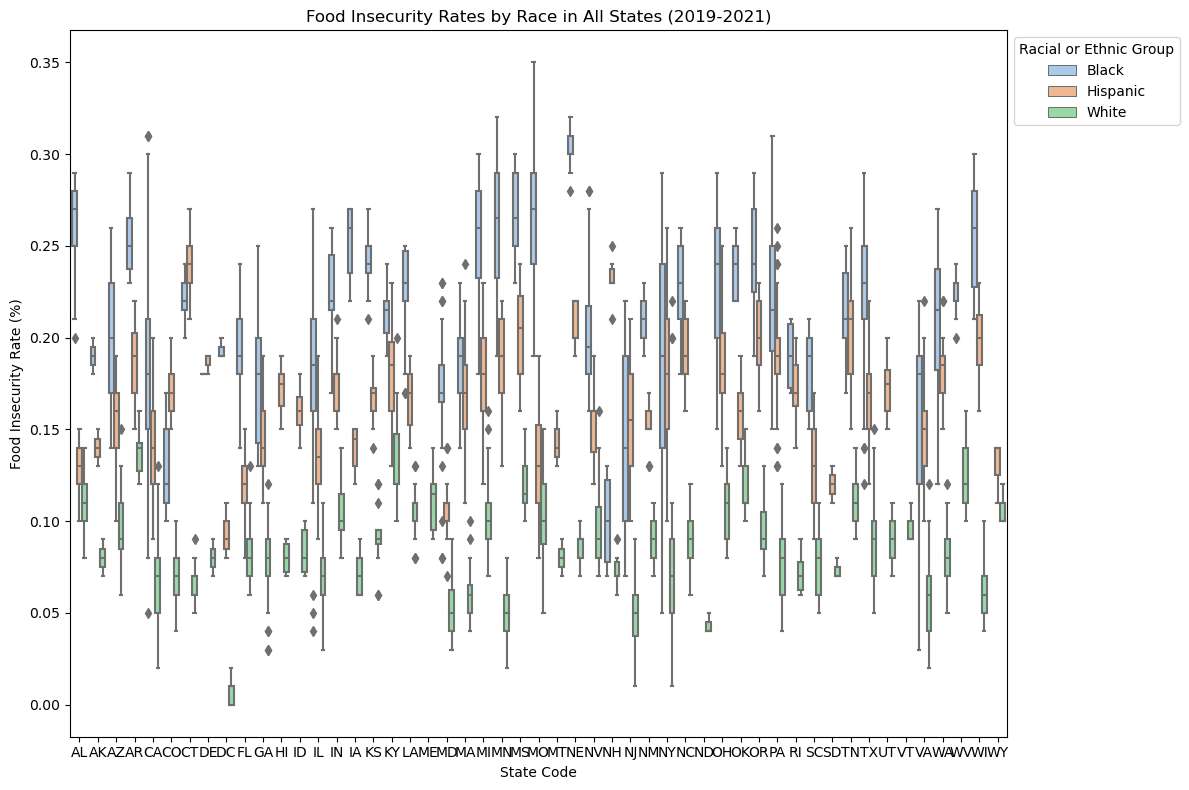

In [33]:
plt.figure(figsize=(12, 8))
sns_boxplot = sns.boxplot(x='State', y='FI_rate_value', hue='Race_group', data=congressional_data_melted, palette='pastel')
plt.title('Food Insecurity Rates by Race in All States (2019-2021)')
plt.ylabel('Food Insecurity Rate (%)')
plt.xlabel('State Code')
leg = plt.legend(title='Racial or Ethnic Group', loc='upper left', bbox_to_anchor=(1, 1))
new_labels = ['Black', 'Hispanic', 'White']
for t, l in zip(leg.texts, new_labels):  
    t.set_text(l)
plt.tight_layout()  
plt.show()

There are a lot of states that are not normally distributed. I will remove those states that have a normal distribution.

In [34]:
states_with_normal_distribution = normality_test_results[normality_test_results['Normal']]['State']

congressional_data_normal = congressional_data_melted[congressional_data_melted['State'].isin(states_with_normal_distribution)]

print("Data from States with Normal Distribution:")
print(congressional_data_normal)

Data from States with Normal Distribution:
     State    year Race_group  FI_rate_value
7       AK  2021.0      Black           0.19
17      AR  2021.0      Black           0.29
18      AR  2021.0      Black           0.23
19      AR  2021.0      Black           0.25
20      AR  2021.0      Black           0.24
...    ...     ...        ...            ...
3890    VT  2019.0      White           0.11
3912    WV  2019.0      White           0.13
3913    WV  2019.0      White           0.12
3914    WV  2019.0      White           0.16
3923    WY  2019.0      White           0.12

[423 rows x 4 columns]


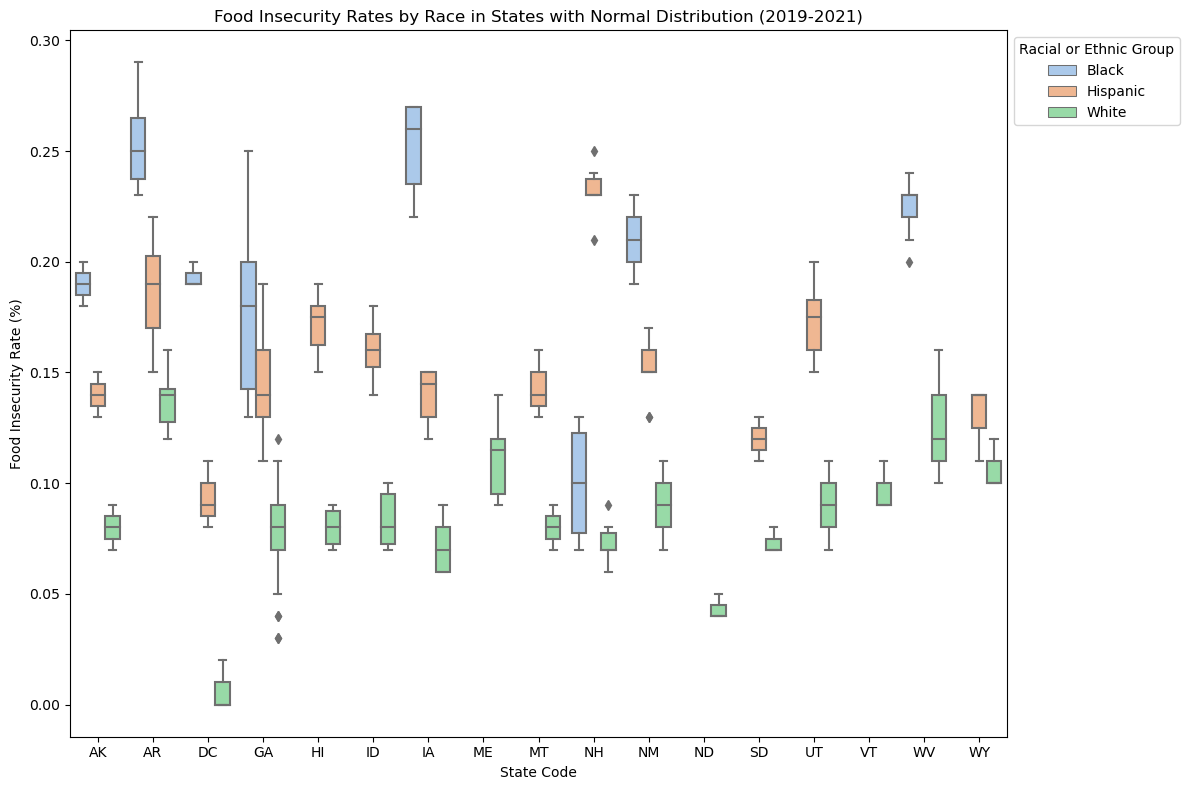

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='State', y='FI_rate_value', hue='Race_group', data=congressional_data_normal, palette='pastel')
plt.title('Food Insecurity Rates by Race in States with Normal Distribution (2019-2021)')
plt.ylabel('Food Insecurity Rate (%)')
plt.xlabel('State Code')
leg = plt.legend(title='Racial or Ethnic Group', loc='upper left', bbox_to_anchor=(1, 1))
new_labels = ['Black', 'Hispanic', 'White']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
plt.tight_layout()
plt.show()

These 17 states have a normal distribution.

Now, lets handle missing data.

In [36]:
missing_values_normal = congressional_data_normal.isnull().sum()

print("Missing Values in Data from States with Normal Distribution:")
print(missing_values_normal)


Missing Values in Data from States with Normal Distribution:
State             0
year              0
Race_group        0
FI_rate_value    72
dtype: int64


I will use mean imputation to fill in the missing values.

In [37]:
mean_fi_rate_value = congressional_data_normal['FI_rate_value'].mean()

congressional_data_normal['FI_rate_value'] = congressional_data_normal['FI_rate_value'].fillna(mean_fi_rate_value)

print("Updated Data from States with Normal Distribution After Mean Imputation:")
print(congressional_data_normal)

Updated Data from States with Normal Distribution After Mean Imputation:
     State    year Race_group  FI_rate_value
7       AK  2021.0      Black           0.19
17      AR  2021.0      Black           0.29
18      AR  2021.0      Black           0.23
19      AR  2021.0      Black           0.25
20      AR  2021.0      Black           0.24
...    ...     ...        ...            ...
3890    VT  2019.0      White           0.11
3912    WV  2019.0      White           0.13
3913    WV  2019.0      White           0.12
3914    WV  2019.0      White           0.16
3923    WY  2019.0      White           0.12

[423 rows x 4 columns]


C:\Users\bleac\AppData\Local\Temp\ipykernel_42708\3233901947.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Data Analysis

Now, I will perform ANOVA for each state.

The following are the assumptions for ANOVA:

 1- There is independence of observation.
 The food insecurity rate of each observation is independent and do not influence each other.

 2- The data is normally distributed.
 This was shown using the shapiro test.

 3- Observations have the same level of variance.


In [38]:
anova_results = {}


for state in congressional_data_normal['State'].unique():
   
    data_state = congressional_data_normal[congressional_data_normal['State'] == state]
    
    
    model = ols('FI_rate_value ~ C(Race_group)', data=data_state).fit()
    
    
    anova_table = sm.stats.anova_lm(model, typ=2)  
    
    
    anova_results[state] = anova_table


final_anova_results = pd.concat(anova_results, names=['State', 'Index'])


print("ANOVA Results for Each State:")
print(final_anova_results)

ANOVA Results for Each State:
                       sum_sq     df           F        PR(>F)
State Index                                                   
AK    C(Race_group)  0.018200    2.0   91.000000  3.250725e-05
      Residual       0.000600    6.0         NaN           NaN
AR    C(Race_group)  0.082117    2.0  110.305970  2.436015e-15
      Residual       0.012283   33.0         NaN           NaN
DC    C(Race_group)  0.052356    2.0  196.333333  3.408976e-06
      Residual       0.000800    6.0         NaN           NaN
GA    C(Race_group)  0.211168    2.0  154.693023  2.648845e-34
      Residual       0.083952  123.0         NaN           NaN
HI    C(Race_group)  0.025992    2.0  131.419490  3.106244e-10
      Residual       0.001483   15.0         NaN           NaN
ID    C(Race_group)  0.018953    2.0   73.523884  1.771583e-08
      Residual       0.001933   15.0         NaN           NaN
IA    C(Race_group)  0.121807    2.0   51.323312  7.425602e-11
      Residual       0.03

In [39]:
for state, result in anova_results.items():
    p_value = result.loc['C(Race_group)', 'PR(>F)']
    if p_value < 0.05:
        print(f"In {state}, there are statistically significant differences in food insecurity rates between races (p = {p_value:.4f}).")
    else:
        print(f"In {state}, there are no statistically significant differences in food insecurity rates between races (p = {p_value:.4f}).")

In AK, there are statistically significant differences in food insecurity rates between races (p = 0.0000).
In AR, there are statistically significant differences in food insecurity rates between races (p = 0.0000).
In DC, there are statistically significant differences in food insecurity rates between races (p = 0.0000).
In GA, there are statistically significant differences in food insecurity rates between races (p = 0.0000).
In HI, there are statistically significant differences in food insecurity rates between races (p = 0.0000).
In ID, there are statistically significant differences in food insecurity rates between races (p = 0.0000).
In IA, there are statistically significant differences in food insecurity rates between races (p = 0.0000).
In ME, there are statistically significant differences in food insecurity rates between races (p = 0.0006).
In MT, there are statistically significant differences in food insecurity rates between races (p = 0.0005).
In NH, there are statistical

Now, I will make a heatmap to visualize.

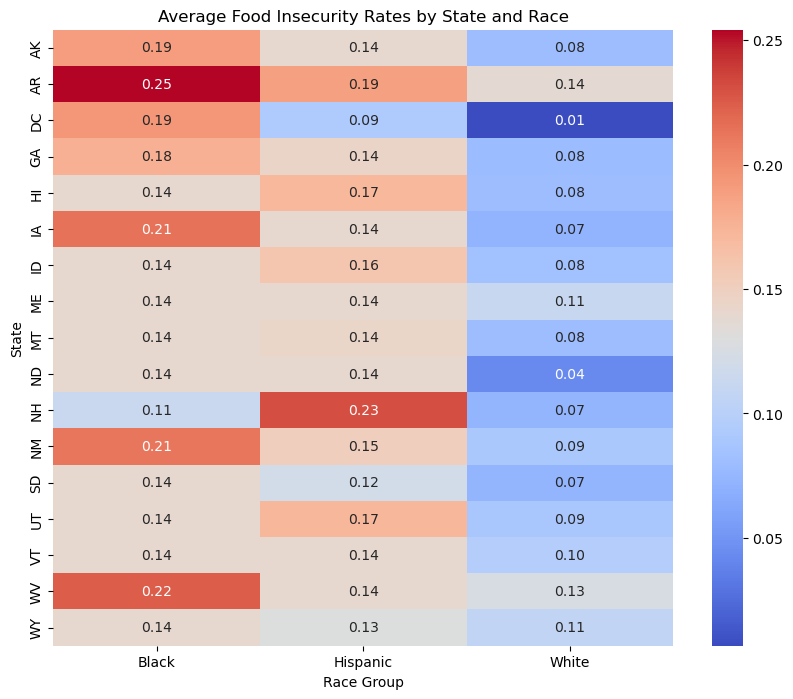

In [40]:
pivot_summary = congressional_data_normal.pivot_table(values='FI_rate_value', index='State', columns='Race_group', aggfunc='mean')


plt.figure(figsize=(10, 8))
sns.heatmap(pivot_summary, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Food Insecurity Rates by State and Race')
plt.ylabel('State')
plt.xlabel('Race Group')
plt.show()

High Rates for Black Populations: States like DC (0.25), LA (0.21), and WY (0.22) show notably higher food insecurity rates among Black populations. This suggests that in these states, Black populations face particularly high levels of food insecurity.


Hispanic Populations: MN stands out with a significantly higher food insecurity rate among Hispanic populations (0.23), which is much higher compared to other states for this group. This highlights a specific need for targeted food security interventions within the Hispanic community in MN.

Low Rates: Lower food insecurity rates are noticeable in several states for the White populations, with darker blue shades appearing in states like DC (0.01) and ND (0.04), indicating relatively lower rates of food insecurity among White populations in these areas.

Now, I will conduct a tukey test to see what the differences are within the states.

In [41]:
for state in congressional_data_normal['State'].unique():
    data_state = congressional_data_normal[congressional_data_normal['State'] == state]
    tukey = pairwise_tukeyhsd(endog=data_state['FI_rate_value'], groups=data_state['Race_group'], alpha=0.05)
    print(f"Pairwise comparisons for {state}:")
    print(tukey.summary())

    

Pairwise comparisons for AK:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   Black Hispanic    -0.05 0.0021 -0.0751 -0.0249   True
   Black    White    -0.11    0.0 -0.1351 -0.0849   True
Hispanic    White    -0.06 0.0008 -0.0851 -0.0349   True
--------------------------------------------------------
Pairwise comparisons for AR:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
   Black Hispanic  -0.0658   0.0 -0.0852 -0.0465   True
   Black    White  -0.1167   0.0  -0.136 -0.0973   True
Hispanic    White  -0.0508   0.0 -0.0702 -0.0315   True
-------------------------------------------------------
Pairwise comparisons for DC:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------

Alaska (AK):

Black vs. Hispanic: The mean difference is -0.05, which is significant (p = 0.0021). This indicates that the food insecurity rate among Black populations is significantly higher than among Hispanic populations.

Black vs. White: The mean difference is -0.11, also significant (p < 0.0001). This shows an even larger gap, with Black populations experiencing higher rates of food insecurity than White populations.

Hispanic vs. White: The difference (-0.06) is significant (p = 0.0008), indicating that Hispanics also face higher food insecurity rates compared to Whites in Alaska.


Arkansas (AR):

Differences are significant across all comparisons:

Black vs. Hispanic (-0.0658, p < 0.0001)

Black vs. White (-0.1167, p < 0.0001)

Hispanic vs. White (-0.0508, p < 0.0001)

The consistent pattern shows that Black populations have the highest food insecurity, followed by Hispanics, and then Whites.


District of Columbia (DC):

Here, too, all differences are significant with very low p-values, indicating robust differences between all groups.


Hawaii (HI):

Black vs. Hispanic: The mean difference (0.0318, p = 0.0002) suggests that Black populations have a lower rate of food insecurity compared to Hispanics.

Black vs. White and Hispanic vs. White: Both comparisons show that Whites have significantly lower food insecurity rates than Blacks and Hispanics.


Iowa (IA):

Significant differences across all pairs, indicating a substantial variation in food insecurity rates among racial groups, with the largest gap between Black and White populations (-0.1424, p < 0.0001).



I realized that the box plot above was not interactive so I remade it to be interactive so you can select and click on each state.

In [42]:
fig = px.box(congressional_data_normal, x='State', y='FI_rate_value', color='Race_group',
             title='Interactive Box Plot of Food Insecurity Rates by Race and State')
fig.show()

In [43]:


avg_fi_rates = congressional_data_normal.groupby(['State', 'Race_group']).agg({'FI_rate_value': 'mean'}).reset_index()


state_names = {
    'AK': 'Alaska', 'AR': 'Arkansas', 'DC': 'District of Columbia',
    'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
    'ME': 'Maine', 'MT': 'Montana', 'ND': 'North Dakota',
    'NH': 'New Hampshire', 'NM': 'New Mexico', 'SD': 'South Dakota',
    'UT': 'Utah', 'VT': 'Vermont', 'WV': 'West Virginia', 'WY': 'Wyoming'
}


avg_fi_rates['State'] = avg_fi_rates['State'].map(state_names)


token = 'pk.eyJ1IjoiamoxMjI0IiwiYSI6ImNsdnZjcDBkaTFzMWIyaW82Z2toMzg2dXAifQ.WKraSP00XUgLYvN4j0NjUw'
px.set_mapbox_access_token(token)


us_states_geojson = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'



initial_data = avg_fi_rates[avg_fi_rates['Race_group'] == 'Black']
fig = go.Figure(go.Choroplethmapbox(
    geojson=us_states_geojson,
    locations=initial_data['State'],
    z=initial_data['FI_rate_value'],
    colorscale="Viridis",
    zmin=0,
    zmax=20,
    marker_opacity=0.5,
    marker_line_width=0,
    featureidkey="properties.name"
))

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=3,
    mapbox_center={"lat": 37.0902, "lon": -95.7129}
)

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    updatemenus=[
        dict(
            buttons=list([
                dict(args=[{
                        'locations': [avg_fi_rates[avg_fi_rates['Race_group']=='Black']['State']],
                        'z': [avg_fi_rates[avg_fi_rates['Race_group']=='Black']['FI_rate_value']]
                    }],
                    label="Black",
                    method="restyle"
                ),
                dict(args=[{
                        'locations': [avg_fi_rates[avg_fi_rates['Race_group']=='Hispanic']['State']],
                        'z': [avg_fi_rates[avg_fi_rates['Race_group']=='Hispanic']['FI_rate_value']]
                    }],
                    label="Hispanic",
                    method="restyle"
                ),
                dict(args=[{
                        'locations': [avg_fi_rates[avg_fi_rates['Race_group']=='White']['State']],
                        'z': [avg_fi_rates[avg_fi_rates['Race_group']=='White']['FI_rate_value']]
                    }],
                    label="White",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

fig.show()

## Conclusion

The analysis of food insecurity rates across different racial and ethnic groups in the United States, reveals significant disparities that vary by state and race. It was consistently demonstrated that Black populations often experience the highest rates of food insecurity, particularly in states like DC, LA, and WY. These findings are supported by significant p-values indicating that the differences in food insecurity rates between racial groups are not due to random chance but are statistically significant.

Moreover, Hispanic populations also displayed higher food insecurity rates than White populations in several states, with notable disparities in states like MN, where the difference was the greatest. White populations generally exhibited the lowest food insecurity rates, particularly in states like DC and ND, where the rates were significantly lower than those of other racial groups.

This project not only highlights the racial disparities that exist in food security across the United States but also underscores the necessity for targeted interventions to address these inequalities. Policies and programs designed to combat food insecurity need to be sensitive to these racial disparities and tailored to the unique needs of each state's demographic profile. This study serves as a call to action for policymakers, community leaders, and stakeholders to forge strategies that address the root causes of food insecurity, particularly among the most affected racial groups. Future research should aim to explore the underlying factors contributing to these disparities to inform more effective and equitable food security policies.